# ESG - Environmental, Social, Governance Index

In [44]:
import pandas as pd
import time

data = pd.read_csv('ESG_scores.csv', index_col=0)
data.head()

,Year,Firm,ESG controversy score,Environment controversy score,Social controvery score,Governance controversy score,Score - Emission Reduction/Biodiversity Controversies (Inactive),Score - Emission Reduction/Spill/Pollution Controversies (Inactive),Score - Product Innovation/Product Impact Controversies (Inactive),Score - Resource Reduction/Environment Impact Controversy (Inactive),...,esg_binaire,csr_com,csr_report,assets,roa,sg,lev,div,ind,country
0,2013,1&1 DRILLISCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,344955.0,47.31,-10.26,25.32,6.33,142,DE
1,2014,1&1 DRILLISCH,NaN,,,,NaN,NaN,NaN,NaN,...,0,NaN,NaN,474808.0,12.82,-0.28,19.14,7.62,142,DE
2,2015,1&1 DRILLISCH,NaN,,,,NaN,NaN,NaN,NaN,...,0,NaN,NaN,673725.0,8.52,117.35,23.35,5.38,142,DE
3,2016,1&1 DRILLISCH,NaN,,,,NaN,NaN,NaN,NaN,...,0,NaN,NaN,582507.0,4.54,12.78,25.08,4.33,142,DE
4,2017,1&1 DRILLISCH,64.41,,54.02692308,52.285,52.99,NaN,52.06,54.61,...,0,0,1.0,4591122.0,18.20,296.09,0.01,4.2,142,DE


In [45]:
# drop the "esg_binaire", "csr_com", "csr_report" columns because they are not reliable (generated by a graduate student!)
data.drop(["esg_binaire", "csr_com", "csr_report"], axis = 1, inplace=True)

In [46]:
# remove "ind" and "country" to leave only numerical values
data.drop(["ind", "country"], axis = 1, inplace=True)

# Question 1

How many rows? How many columns in the dataset?

In [47]:
print(data.shape) # (6582,39) measurements

(6582, 39)


# Question 2

What is the datatype of column "div" immediately after you read the file?

In [48]:
# check the datatypes
data.dtypes

Year                                                                        int64
Firm                                                                       object
ESG controversy score                                                     float64
Environment controversy score                                              object
Social controvery score                                                    object
Governance controversy score                                               object
Score - Emission Reduction/Biodiversity Controversies (Inactive)          float64
Score - Emission Reduction/Spill/Pollution Controversies (Inactive)       float64
Score - Product Innovation/Product Impact Controversies (Inactive)        float64
Score - Resource Reduction/Environment Impact Controversy (Inactive)      float64
Score - Client Loyalty/Anti-competition Controversy (Inactive)            float64
Score - Community/Bribery Corruption Fraud Controversies (Inactive)       float64
Score - Communit

In [49]:
# make a copy of the data in a variable called df
df = data.copy()

In [50]:
# convert all columns except columns "Year" and "Firm" into float64
column_to_not_convert = ['Year', 'Firm']
column_to_convert = [x for x in list(data) if x not in column_to_not_convert ]

for col in column_to_convert:
            df[col] = pd.to_numeric(df[col], errors='coerce')

df.head()

,Year,Firm,ESG controversy score,Environment controversy score,Social controvery score,Governance controversy score,Score - Emission Reduction/Biodiversity Controversies (Inactive),Score - Emission Reduction/Spill/Pollution Controversies (Inactive),Score - Product Innovation/Product Impact Controversies (Inactive),Score - Resource Reduction/Environment Impact Controversy (Inactive),...,tobin,roe,oia,ois,esg_score,assets,roa,sg,lev,div
0,2013,1&1 DRILLISCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.456,19.47,0.182696,0.216966,NaN,344955.0,47.31,-10.26,25.32,6.33
1,2014,1&1 DRILLISCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.633,71.57,0.164814,0.270173,NaN,474808.0,12.82,-0.28,19.14,7.62
2,2015,1&1 DRILLISCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.834,15.12,0.090147,0.096473,NaN,673725.0,8.52,117.35,23.35,5.38
3,2016,1&1 DRILLISCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.222,13.06,0.107609,0.088284,NaN,582507.0,4.54,12.78,25.08,4.33
4,2017,1&1 DRILLISCH,64.41,NaN,54.026923,52.285,52.99,NaN,52.06,54.61,...,3.933,9.33,0.089738,0.146498,31.63,4591122.0,18.20,296.09,0.01,4.20


In [51]:
df.dtypes

Year                                                                        int64
Firm                                                                       object
ESG controversy score                                                     float64
Environment controversy score                                             float64
Social controvery score                                                   float64
Governance controversy score                                              float64
Score - Emission Reduction/Biodiversity Controversies (Inactive)          float64
Score - Emission Reduction/Spill/Pollution Controversies (Inactive)       float64
Score - Product Innovation/Product Impact Controversies (Inactive)        float64
Score - Resource Reduction/Environment Impact Controversy (Inactive)      float64
Score - Client Loyalty/Anti-competition Controversy (Inactive)            float64
Score - Community/Bribery Corruption Fraud Controversies (Inactive)       float64
Score - Communit

#Question 3:

How many NaN values in total do we have in column "assets"? In column "roa"?

In [52]:
# check for NULL created in the process
df.isnull().sum()

Year                                                                         0
Firm                                                                         0
ESG controversy score                                                      961
Environment controversy score                                             2565
Social controvery score                                                   3389
Governance controversy score                                               965
Score - Emission Reduction/Biodiversity Controversies (Inactive)           965
Score - Emission Reduction/Spill/Pollution Controversies (Inactive)       2565
Score - Product Innovation/Product Impact Controversies (Inactive)         965
Score - Resource Reduction/Environment Impact Controversy (Inactive)       965
Score - Client Loyalty/Anti-competition Controversy (Inactive)             965
Score - Community/Bribery Corruption Fraud Controversies (Inactive)        965
Score - Community/Critical Countries-Indigenous Cont

In [53]:
# remove columns 
df.drop(["Environment controversy score"], axis=1, inplace=True)
df.drop(["Social controvery score"], axis=1, inplace=True)
df.drop(["Score - Emission Reduction/Spill/Pollution Controversies (Inactive)"], axis=1, inplace=True)
df.drop(["Score - Product Responsibility/Responsible Mrktg Controversy(Inactive)"], axis=1, inplace=True)

In [54]:
df.head()

,Year,Firm,ESG controversy score,Governance controversy score,Score - Emission Reduction/Biodiversity Controversies (Inactive),Score - Product Innovation/Product Impact Controversies (Inactive),Score - Resource Reduction/Environment Impact Controversy (Inactive),Score - Client Loyalty/Anti-competition Controversy (Inactive),Score - Community/Bribery Corruption Fraud Controversies (Inactive),Score - Community/Critical Countries-Indigenous Controversy (Inactive),...,tobin,roe,oia,ois,esg_score,assets,roa,sg,lev,div
0,2013,1&1 DRILLISCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.456,19.47,0.182696,0.216966,NaN,344955.0,47.31,-10.26,25.32,6.33
1,2014,1&1 DRILLISCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.633,71.57,0.164814,0.270173,NaN,474808.0,12.82,-0.28,19.14,7.62
2,2015,1&1 DRILLISCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.834,15.12,0.090147,0.096473,NaN,673725.0,8.52,117.35,23.35,5.38
3,2016,1&1 DRILLISCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.222,13.06,0.107609,0.088284,NaN,582507.0,4.54,12.78,25.08,4.33
4,2017,1&1 DRILLISCH,64.41,52.285,52.99,52.06,54.61,59.67,62.6,52.36,...,3.933,9.33,0.089738,0.146498,31.63,4591122.0,18.20,296.09,0.01,4.20


In [55]:
df.isna().sum()

Year                                                                        0
Firm                                                                        0
ESG controversy score                                                     961
Governance controversy score                                              965
Score - Emission Reduction/Biodiversity Controversies (Inactive)          965
Score - Product Innovation/Product Impact Controversies (Inactive)        965
Score - Resource Reduction/Environment Impact Controversy (Inactive)      965
Score - Client Loyalty/Anti-competition Controversy (Inactive)            965
Score - Community/Bribery Corruption Fraud Controversies (Inactive)       965
Score - Community/Critical Countries-Indigenous Controversy (Inactive)    965
Score - Community/Public Health Controversies (Inactive)                  965
Score - Diversity and Opportunity/Diversity Controversies (Inactive)      965
Score - Employment Quality/Wages Work Condition Controversy (Ina

In [56]:
# drop rows with at least one NaN
df.dropna(axis=0, how='any', inplace=True)

# Question 4:

How many rows are left after dropping rows with at least one NaN value?

In [57]:
print(df.shape) # that should leave 5196,35 measurements, but has the same company at multiple years

(5196, 35)


In [58]:
df.reset_index(inplace=True, drop=True)
df.head()

,Year,Firm,ESG controversy score,Governance controversy score,Score - Emission Reduction/Biodiversity Controversies (Inactive),Score - Product Innovation/Product Impact Controversies (Inactive),Score - Resource Reduction/Environment Impact Controversy (Inactive),Score - Client Loyalty/Anti-competition Controversy (Inactive),Score - Community/Bribery Corruption Fraud Controversies (Inactive),Score - Community/Critical Countries-Indigenous Controversy (Inactive),...,tobin,roe,oia,ois,esg_score,assets,roa,sg,lev,div
0,2017,1&1 DRILLISCH,64.41,52.2850,52.99,52.06,54.61,59.67,62.60,52.36,...,3.933,9.33,0.089738,0.146498,31.63,4591122.0,18.20,296.09,0.01,4.20
1,2018,1&1 DRILLISCH,68.67,53.7250,51.39,51.04,55.27,60.98,64.61,51.91,...,2.600,12.21,0.099416,0.142417,34.01,5246640.0,8.26,30.23,0.76,2.63
2,2013,3I GROUP,62.50,52.1400,53.21,52.18,53.38,58.41,63.56,52.57,...,0.622,-17.44,0.087955,0.989556,62.97,4309000.0,6.35,28.96,23.65,3.73
3,2014,3I GROUP,9.09,39.0525,53.67,52.59,53.76,59.29,63.28,52.85,...,0.823,21.85,0.117164,0.821086,68.58,4387000.0,13.35,-17.96,19.49,3.14
4,2015,3I GROUP,56.96,51.4600,53.40,52.34,53.40,56.89,59.57,52.57,...,0.878,17.81,0.123982,0.991857,62.80,4912000.0,16.04,1.49,16.59,4.29


In [59]:
Firms = df[["Firm", "Year"]]

In [60]:
# select the features to normalize
column_to_not_normalize = ['Year', 'Firm', 'esg_score']
column_to_normalize = [x for x in list(df) if x not in column_to_not_normalize ]
df = df[column_to_normalize]
df.head()

,ESG controversy score,Governance controversy score,Score - Emission Reduction/Biodiversity Controversies (Inactive),Score - Product Innovation/Product Impact Controversies (Inactive),Score - Resource Reduction/Environment Impact Controversy (Inactive),Score - Client Loyalty/Anti-competition Controversy (Inactive),Score - Community/Bribery Corruption Fraud Controversies (Inactive),Score - Community/Critical Countries-Indigenous Controversy (Inactive),Score - Community/Public Health Controversies (Inactive),Score - Diversity and Opportunity/Diversity Controversies (Inactive),...,mc,tobin,roe,oia,ois,assets,roa,sg,lev,div
0,64.41,52.2850,52.99,52.06,54.61,59.67,62.60,52.36,52.16,53.57,...,12166711.0,3.933,9.33,0.089738,0.146498,4591122.0,18.20,296.09,0.01,4.20
1,68.67,53.7250,51.39,51.04,55.27,60.98,64.61,51.91,53.15,54.61,...,7848196.0,2.600,12.21,0.099416,0.142417,5246640.0,8.26,30.23,0.76,2.63
2,62.50,52.1400,53.21,52.18,53.38,58.41,63.56,52.57,54.63,54.38,...,3069640.0,0.622,-17.44,0.087955,0.989556,4309000.0,6.35,28.96,23.65,3.73
3,9.09,39.0525,53.67,52.59,53.76,59.29,63.28,52.85,53.76,54.12,...,3866805.0,0.823,21.85,0.117164,0.821086,4387000.0,13.35,-17.96,19.49,3.14
4,56.96,51.4600,53.40,52.34,53.40,56.89,59.57,52.57,52.21,53.13,...,4691117.0,0.878,17.81,0.123982,0.991857,4912000.0,16.04,1.49,16.59,4.29


In [61]:
df.shape

(5196, 32)

In [62]:
df["Score - Product Responsibility/Social Exclusion Controversy (Inactive)"]

0       50.0
1       50.0
2       50.0
3       50.0
4       50.0
        ... 
5191    50.0
5192    50.0
5193    50.0
5194    50.0
5195    50.0
Name: Score - Product Responsibility/Social Exclusion Controversy (Inactive), Length: 5196, dtype: float64

In [63]:
# check that all types are floats
df.dtypes

ESG controversy score                                                     float64
Governance controversy score                                              float64
Score - Emission Reduction/Biodiversity Controversies (Inactive)          float64
Score - Product Innovation/Product Impact Controversies (Inactive)        float64
Score - Resource Reduction/Environment Impact Controversy (Inactive)      float64
Score - Client Loyalty/Anti-competition Controversy (Inactive)            float64
Score - Community/Bribery Corruption Fraud Controversies (Inactive)       float64
Score - Community/Critical Countries-Indigenous Controversy (Inactive)    float64
Score - Community/Public Health Controversies (Inactive)                  float64
Score - Diversity and Opportunity/Diversity Controversies (Inactive)      float64
Score - Employment Quality/Wages Work Condition Controversy (Inactive)    float64
Score - Health & Safety/Health & Safety Controversies (Inactive)          float64
Score - Human Ri

In [64]:
def normalize(df, column_to_normalize):
    result = df.copy()
    for feature_name in column_to_normalize:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [65]:
df_normalized = normalize(df, column_to_normalize)

In [66]:
df_normalized.isnull().sum()

ESG controversy score                                                        0
Governance controversy score                                                 0
Score - Emission Reduction/Biodiversity Controversies (Inactive)             0
Score - Product Innovation/Product Impact Controversies (Inactive)           0
Score - Resource Reduction/Environment Impact Controversy (Inactive)         0
Score - Client Loyalty/Anti-competition Controversy (Inactive)               0
Score - Community/Bribery Corruption Fraud Controversies (Inactive)          0
Score - Community/Critical Countries-Indigenous Controversy (Inactive)       0
Score - Community/Public Health Controversies (Inactive)                     0
Score - Diversity and Opportunity/Diversity Controversies (Inactive)         0
Score - Employment Quality/Wages Work Condition Controversy (Inactive)       0
Score - Health & Safety/Health & Safety Controversies (Inactive)             0
Score - Human Rights/Child Labor Controversies (Inac

In [67]:
#drop the constant column
df_normalized.drop("Score - Product Responsibility/Social Exclusion Controversy (Inactive)", axis=1, inplace=True)

In [68]:
df_normalized.head()

,ESG controversy score,Governance controversy score,Score - Emission Reduction/Biodiversity Controversies (Inactive),Score - Product Innovation/Product Impact Controversies (Inactive),Score - Resource Reduction/Environment Impact Controversy (Inactive),Score - Client Loyalty/Anti-competition Controversy (Inactive),Score - Community/Bribery Corruption Fraud Controversies (Inactive),Score - Community/Critical Countries-Indigenous Controversy (Inactive),Score - Community/Public Health Controversies (Inactive),Score - Diversity and Opportunity/Diversity Controversies (Inactive),...,mc,tobin,roe,oia,ois,assets,roa,sg,lev,div
0,0.890257,0.964232,0.987330,0.989922,0.978148,0.977716,0.968890,0.990728,0.954787,0.980956,...,0.004092,0.053618,0.923501,0.445670,0.772506,0.000348,0.384028,0.001801,0.000079,0.103321
1,0.949211,1.000000,0.957518,0.970527,0.989970,0.999181,1.000000,0.982214,0.972909,1.000000,...,0.002637,0.038972,0.923557,0.447363,0.772492,0.000398,0.359626,0.000592,0.006026,0.064699
2,0.863825,0.960631,0.991429,0.992204,0.956117,0.957070,0.983749,0.994702,1.000000,0.995788,...,0.001028,0.017239,0.922978,0.445359,0.775577,0.000327,0.354937,0.000586,0.187520,0.091759
3,0.124689,0.635556,1.000000,1.000000,0.962923,0.971489,0.979415,1.000000,0.984075,0.991027,...,0.001296,0.019447,0.923745,0.450466,0.774963,0.000332,0.372122,0.000373,0.154535,0.077245
4,0.787157,0.943741,0.994969,0.995246,0.956475,0.932165,0.921993,0.994702,0.955702,0.972899,...,0.001574,0.020052,0.923666,0.451658,0.775585,0.000372,0.378725,0.000461,0.131541,0.105535


In [69]:
df_normalized.columns

Index(['ESG controversy score', 'Governance controversy score',
       'Score - Emission Reduction/Biodiversity Controversies (Inactive)',
       'Score - Product Innovation/Product Impact Controversies (Inactive)',
       'Score - Resource Reduction/Environment Impact Controversy (Inactive)',
       'Score - Client Loyalty/Anti-competition Controversy (Inactive)',
       'Score - Community/Bribery Corruption Fraud Controversies (Inactive)',
       'Score - Community/Critical Countries-Indigenous Controversy (Inactive)',
       'Score - Community/Public Health Controversies (Inactive)',
       'Score - Diversity and Opportunity/Diversity Controversies (Inactive)',
       'Score - Employment Quality/Wages Work Condition Controversy (Inactive)',
       'Score - Health & Safety/Health & Safety Controversies (Inactive)',
       'Score - Human Rights/Child Labor Controversies (Inactive)',
       'Score - Human Rights/Freedom of Association Controversies (Inactive)',
       'Score - Human Ri

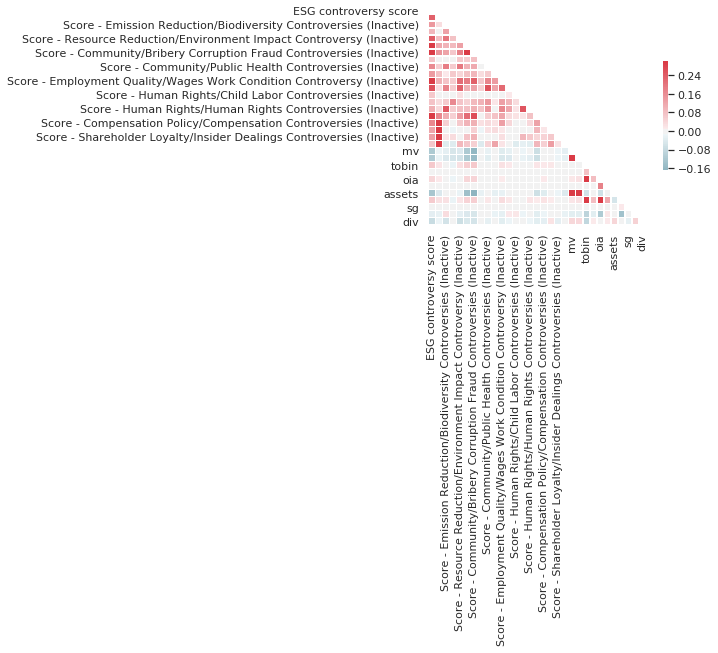

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df_normalized.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [71]:
corr

,ESG controversy score,Governance controversy score,Score - Emission Reduction/Biodiversity Controversies (Inactive),Score - Product Innovation/Product Impact Controversies (Inactive),Score - Resource Reduction/Environment Impact Controversy (Inactive),Score - Client Loyalty/Anti-competition Controversy (Inactive),Score - Community/Bribery Corruption Fraud Controversies (Inactive),Score - Community/Critical Countries-Indigenous Controversy (Inactive),Score - Community/Public Health Controversies (Inactive),Score - Diversity and Opportunity/Diversity Controversies (Inactive),...,mc,tobin,roe,oia,ois,assets,roa,sg,lev,div
ESG controversy score,1.000000,0.235534,0.146087,0.094396,0.242913,0.545045,0.704676,0.072932,0.167609,0.142441,...,-0.113659,0.065667,-0.002535,0.044423,-0.008327,-0.126412,0.061919,0.008061,-0.029195,-0.072271
Governance controversy score,0.235534,1.000000,0.032804,-0.008386,0.081487,0.120727,0.150920,-0.005912,0.056786,0.081536,...,-0.018441,0.022241,0.002745,0.015522,0.001503,-0.042725,0.026910,0.008843,-0.021599,-0.015269
Score - Emission Reduction/Biodiversity Controversies (Inactive),0.146087,0.032804,1.000000,0.131048,0.200010,0.102045,0.126147,0.005831,0.187804,0.015822,...,-0.043616,0.009263,-0.002255,0.010790,-0.000702,-0.004549,0.026282,-0.000074,0.033524,-0.058072
Score - Product Innovation/Product Impact Controversies (Inactive),0.094396,-0.008386,0.131048,1.000000,0.079908,0.090515,0.070037,0.007065,0.062326,0.065636,...,-0.053120,-0.018580,-0.003515,-0.016705,-0.001166,-0.006908,-0.017516,-0.000660,-0.008551,-0.006774
Score - Resource Reduction/Environment Impact Controversy (Inactive),0.242913,0.081487,0.200010,0.079908,1.000000,0.131827,0.185006,0.066369,0.194061,0.047003,...,-0.058208,0.029345,0.000496,0.011196,-0.002899,-0.017144,0.020773,0.002964,-0.027699,-0.065193
Score - Client Loyalty/Anti-competition Controversy (Inactive),0.545045,0.120727,0.102045,0.090515,0.131827,1.000000,0.769271,0.058495,0.100607,0.079350,...,-0.117582,0.056510,-0.002568,0.045805,-0.001434,-0.140086,0.049389,0.008982,-0.042850,-0.045980
Score - Community/Bribery Corruption Fraud Controversies (Inactive),0.704676,0.150920,0.126147,0.070037,0.185006,0.769271,1.000000,0.082842,0.115531,0.095341,...,-0.151877,0.066179,-0.003718,0.048785,-0.002716,-0.168873,0.057987,0.010272,-0.049259,-0.054600
Score - Community/Critical Countries-Indigenous Controversy (Inactive),0.072932,-0.005912,0.005831,0.007065,0.066369,0.058495,0.082842,1.000000,-0.000086,0.037833,...,-0.006803,0.006176,-0.001619,0.012364,-0.000074,-0.021218,0.010642,-0.000095,-0.005963,0.012179
Score - Community/Public Health Controversies (Inactive),0.167609,0.056786,0.187804,0.062326,0.194061,0.100607,0.115531,-0.000086,1.000000,0.060431,...,-0.033206,0.011437,-0.003104,-0.000389,-0.002602,-0.003859,0.017447,0.000759,0.007298,-0.023948
Score - Diversity and Opportunity/Diversity Controversies (Inactive),0.142441,0.081536,0.015822,0.065636,0.047003,0.079350,0.095341,0.037833,0.060431,1.000000,...,-0.007555,0.012349,-0.002040,0.007035,0.002095,-0.024533,0.007576,0.003459,-0.017938,-0.010580


In [72]:
# the above corr has NaN values in "Score - Product Responsibility/Social Exclusion Controversy (Inactive)". WHY?

In [73]:
Firms["c"] = Firms["Firm"] + "_" +Firms["Year"].map(lambda x: str(x))
Firms

,Firm,Year,c
0,1&1 DRILLISCH,2017,1&1 DRILLISCH_2017
1,1&1 DRILLISCH,2018,1&1 DRILLISCH_2018
2,3I GROUP,2013,3I GROUP_2013
3,3I GROUP,2014,3I GROUP_2014
4,3I GROUP,2015,3I GROUP_2015
...,...,...,...
5191,ZURICH INSURANCE GROUP,2014,ZURICH INSURANCE GROUP_2014
5192,ZURICH INSURANCE GROUP,2015,ZURICH INSURANCE GROUP_2015
5193,ZURICH INSURANCE GROUP,2016,ZURICH INSURANCE GROUP_2016
5194,ZURICH INSURANCE GROUP,2017,ZURICH INSURANCE GROUP_2017


In [74]:
Firms[Firms["Firm"] == "ZURICH INSURANCE GROUP"]

,Firm,Year,c
5190,ZURICH INSURANCE GROUP,2013,ZURICH INSURANCE GROUP_2013
5191,ZURICH INSURANCE GROUP,2014,ZURICH INSURANCE GROUP_2014
5192,ZURICH INSURANCE GROUP,2015,ZURICH INSURANCE GROUP_2015
5193,ZURICH INSURANCE GROUP,2016,ZURICH INSURANCE GROUP_2016
5194,ZURICH INSURANCE GROUP,2017,ZURICH INSURANCE GROUP_2017
5195,ZURICH INSURANCE GROUP,2018,ZURICH INSURANCE GROUP_2018


In [75]:
df.loc[5190:,:]

,ESG controversy score,Governance controversy score,Score - Emission Reduction/Biodiversity Controversies (Inactive),Score - Product Innovation/Product Impact Controversies (Inactive),Score - Resource Reduction/Environment Impact Controversy (Inactive),Score - Client Loyalty/Anti-competition Controversy (Inactive),Score - Community/Bribery Corruption Fraud Controversies (Inactive),Score - Community/Critical Countries-Indigenous Controversy (Inactive),Score - Community/Public Health Controversies (Inactive),Score - Diversity and Opportunity/Diversity Controversies (Inactive),...,mc,tobin,roe,oia,ois,assets,roa,sg,lev,div
5190,8.39,52.1400,53.21,52.18,53.38,58.41,63.56,52.57,54.63,0.00,...,38150094.0,0.116,13.18,0.017223,0.091288,352784115.0,1.16,1.31,3.93,6.98
5191,60.13,52.2175,53.67,52.59,53.76,59.29,63.28,52.85,53.76,54.12,...,46239017.0,0.135,13.54,0.015881,0.091742,386087492.0,1.06,0.42,3.59,6.58
5192,6.74,51.4600,53.40,52.34,53.40,56.89,59.57,52.57,52.21,53.13,...,38543211.0,0.141,11.73,0.011441,0.071267,363468486.0,0.54,-12.69,3.25,5.45
5193,55.02,51.9200,53.13,52.16,55.56,58.44,61.12,52.32,52.76,52.76,...,41892849.0,0.121,6.19,0.015996,0.089383,371956100.0,0.94,14.08,3.48,6.58
5194,54.65,52.2850,52.99,52.06,54.61,59.67,62.60,52.36,52.16,53.57,...,44544362.0,0.133,11.12,0.014694,0.091190,389669154.0,0.84,-5.67,3.08,6.06
5195,3.01,53.7250,51.39,51.04,55.27,0.02,0.38,51.91,53.15,54.61,...,43163546.0,0.129,10.09,0.015385,0.122217,366305640.0,1.04,-26.56,3.59,5.73


In [76]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# ESG = {"StockName": list(Firms["c"]),
#       "StockData": np.array(df_normalized.iloc[:, 1:], dtype=float),
#       "Score": np.array(df_normalized.iloc[:,0], dtype=float).reshape((-1,1))}

In [36]:
# savemat("Experiments_MATLAB/data/esg.mat", ESG, appendmat=True)

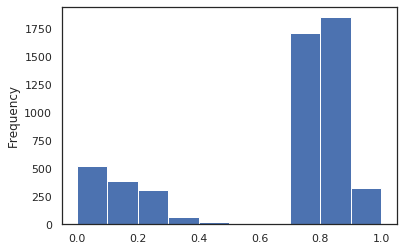

In [77]:
df_normalized["ESG controversy score"].plot(kind="hist")

In [78]:
import sys
sys.path.append('../Multi-objective-2D-Embeddings/Python_implementation/')

In [79]:
from MoDE import MoDE
from sklearn.manifold import TSNE, Isomap, MDS
from metrics import distance_metric, correlation_metric, order_preservation

In [80]:
data = np.array(df_normalized.iloc[:, 1:], dtype=float)
score = np.array(df_normalized.iloc[:,0], dtype=float).reshape((-1,1))

In [83]:
#MoDE
# for now using exact distance matrix
from sklearn.metrics import pairwise_distances
dm = pairwise_distances(data, n_jobs=-1)
dm = np.round(dm, decimals=5)
mode = MoDE(n_neighbor=20, max_iter=100000, tol=0.0001, verbose=True)
start = time.time()

mode_esg = mode.fit_transform(data, score.squeeze(), dm, dm)

print("time: ", time.time() - start)

Start of Gradient Descent algorithm
0 out of 100000 iterations has passed
10000 out of 100000 iterations has passed
20000 out of 100000 iterations has passed
30000 out of 100000 iterations has passed
40000 out of 100000 iterations has passed
50000 out of 100000 iterations has passed
60000 out of 100000 iterations has passed
70000 out of 100000 iterations has passed
80000 out of 100000 iterations has passed
90000 out of 100000 iterations has passed
end of GD algorithm
time:  433.42033290863037


In [84]:
tsne = TSNE(n_components=2, perplexity=6.5, n_iter=3000, verbose=1)

In [86]:
tsne_esg = tsne.fit_transform(data)

[t-SNE] Computing 20 nearest neighbors...
[t-SNE] Indexed 5196 samples in 0.116s...
[t-SNE] Computed neighbors for 5196 samples in 1.012s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5196
[t-SNE] Computed conditional probabilities for sample 2000 / 5196
[t-SNE] Computed conditional probabilities for sample 3000 / 5196
[t-SNE] Computed conditional probabilities for sample 4000 / 5196
[t-SNE] Computed conditional probabilities for sample 5000 / 5196
[t-SNE] Computed conditional probabilities for sample 5196 / 5196
[t-SNE] Mean sigma: 0.014312
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.632301
[t-SNE] KL divergence after 3000 iterations: 0.764855


In [87]:
isomap = Isomap(n_neighbors=20, n_components=2)
isomap_esg = isomap.fit_transform(data)

In [88]:
mds = MDS()
mds_esg = mds.fit_transform(data)

In [89]:
points_to_show = [5191,5193,5195]

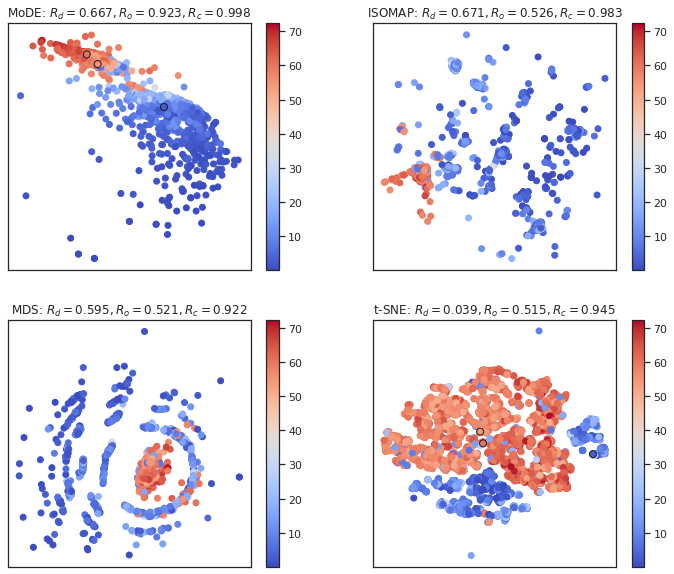

In [95]:
fig, ax = plt.subplots(2,2, figsize=(12,10))
p1 = ax[0,0].scatter(mode_esg[:, 0], mode_esg[:,1], c=df["ESG controversy score"], cmap="coolwarm")
ax[0,0].scatter(mode_esg[points_to_show, 0], mode_esg[points_to_show,1], marker="o", facecolors='none', edgecolors='k', s=50)
R_d = distance_metric(data, mode_esg, dm, n_neighbor=20)
R_c = correlation_metric(data, mode_esg, dm, n_neighbor=20)
R_o = order_preservation(mode_esg, dm, n_neighbor=20, score=score.squeeze())
ax[0,0].set_title("MoDE: $R_d={}, R_o={}, R_c={}$".format(np.round(R_d, 3), np.round(R_o, 3), np.round(R_c, 3)))
fig.colorbar(p1, ax=ax[0,0]);

p2 = ax[0,1].scatter(isomap_esg[:, 0], isomap_esg[:,1], c=df["ESG controversy score"], cmap="coolwarm")
R_d = distance_metric(data, isomap_esg, dm, n_neighbor=20)
R_c = correlation_metric(data, isomap_esg, dm, n_neighbor=20)
R_o = order_preservation(isomap_esg, dm, n_neighbor=20, score=score.squeeze())
ax[0,1].set_title("ISOMAP: $R_d={}, R_o={}, R_c={}$".format(np.round(R_d, 3), np.round(R_o, 3), np.round(R_c, 3)))
fig.colorbar(p2, ax=ax[0,1]);

p3 = ax[1,0].scatter(mds_esg[:, 0], mds_esg[:,1], c=df["ESG controversy score"], cmap="coolwarm")
R_d = distance_metric(data, mds_esg, dm, n_neighbor=20)
R_c = correlation_metric(data, mds_esg, dm, n_neighbor=20)
R_o = order_preservation(mds_esg, dm, n_neighbor=20, score=score.squeeze())
ax[1,0].set_title("MDS: $R_d={}, R_o={}, R_c={}$".format(np.round(R_d, 3), np.round(R_o, 3), np.round(R_c, 3)))
fig.colorbar(p3, ax=ax[1,0]);

p4 = ax[1,1].scatter(tsne_esg[:, 0], tsne_esg[:,1], c=df["ESG controversy score"], cmap="coolwarm")
ax[1,1].scatter(tsne_esg[points_to_show, 0], tsne_esg[points_to_show,1], marker="o", facecolors='none', edgecolors='k', s=50)
R_d = distance_metric(data, tsne_esg, dm, n_neighbor=20)
R_c = correlation_metric(data, tsne_esg, dm, n_neighbor=20)
R_o = order_preservation(tsne_esg, dm, n_neighbor=20, score=score.squeeze())
ax[1,1].set_title("t-SNE: $R_d={}, R_o={}, R_c={}$".format(np.round(R_d, 3), np.round(R_o, 3), np.round(R_c, 3)))

fig.colorbar(p4, ax=ax[1,1]);
# remove the x and y ticks
for a in ax.reshape((-1)):
    a.set_xticks([])
    a.set_yticks([])
plt.savefig("figures/ESG.jpg", dpi=1200);
plt.show();